<a href="https://colab.research.google.com/github/jafetimbre/optimus/blob/master/src/lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install dask[dataframe]

     |████████████████████████████████| 112kB 5.2MB/s 


In [13]:
import dask
import dask.array as da
import dask.dataframe as dd
import dask.delayed as delayed

In [10]:
dask_sch = {
    'THREADS': 'threads',           # planificator pe fire de executie
    'PROCESSES': 'processes',       # planificator pe procese
    'SYNCRONOUS': 'synchronous'     # planificator sincron (rulare sincron)
}
dask_scheduler_selected = 'THREADS'
dask.config.set(scheduler=dask_sch[dask_scheduler_selected])        

In [9]:
from dask.distributed import Client

In [16]:
# client = Client()       #distribuire

In [23]:
def inc(num):
    return num + 1

In [22]:
def add(a, b):
    return a + b

In [24]:
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x,y)

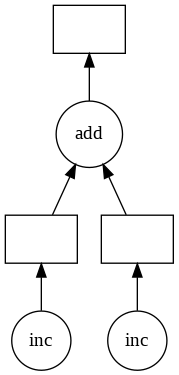

In [25]:
z.visualize()

# Laborator

In [32]:
scheduler_types = {
    'MULTIPROCESSING': 'multiprocessing',
    'PROCESSES': 'processes',
    'SINGLE-THREADED': 'single-threaded',
    'SYNC': 'sync',
    'SYNCHRONOUS': 'synchronous',
    'THREADING': 'threading',
    'THREADS': 'threads'
}

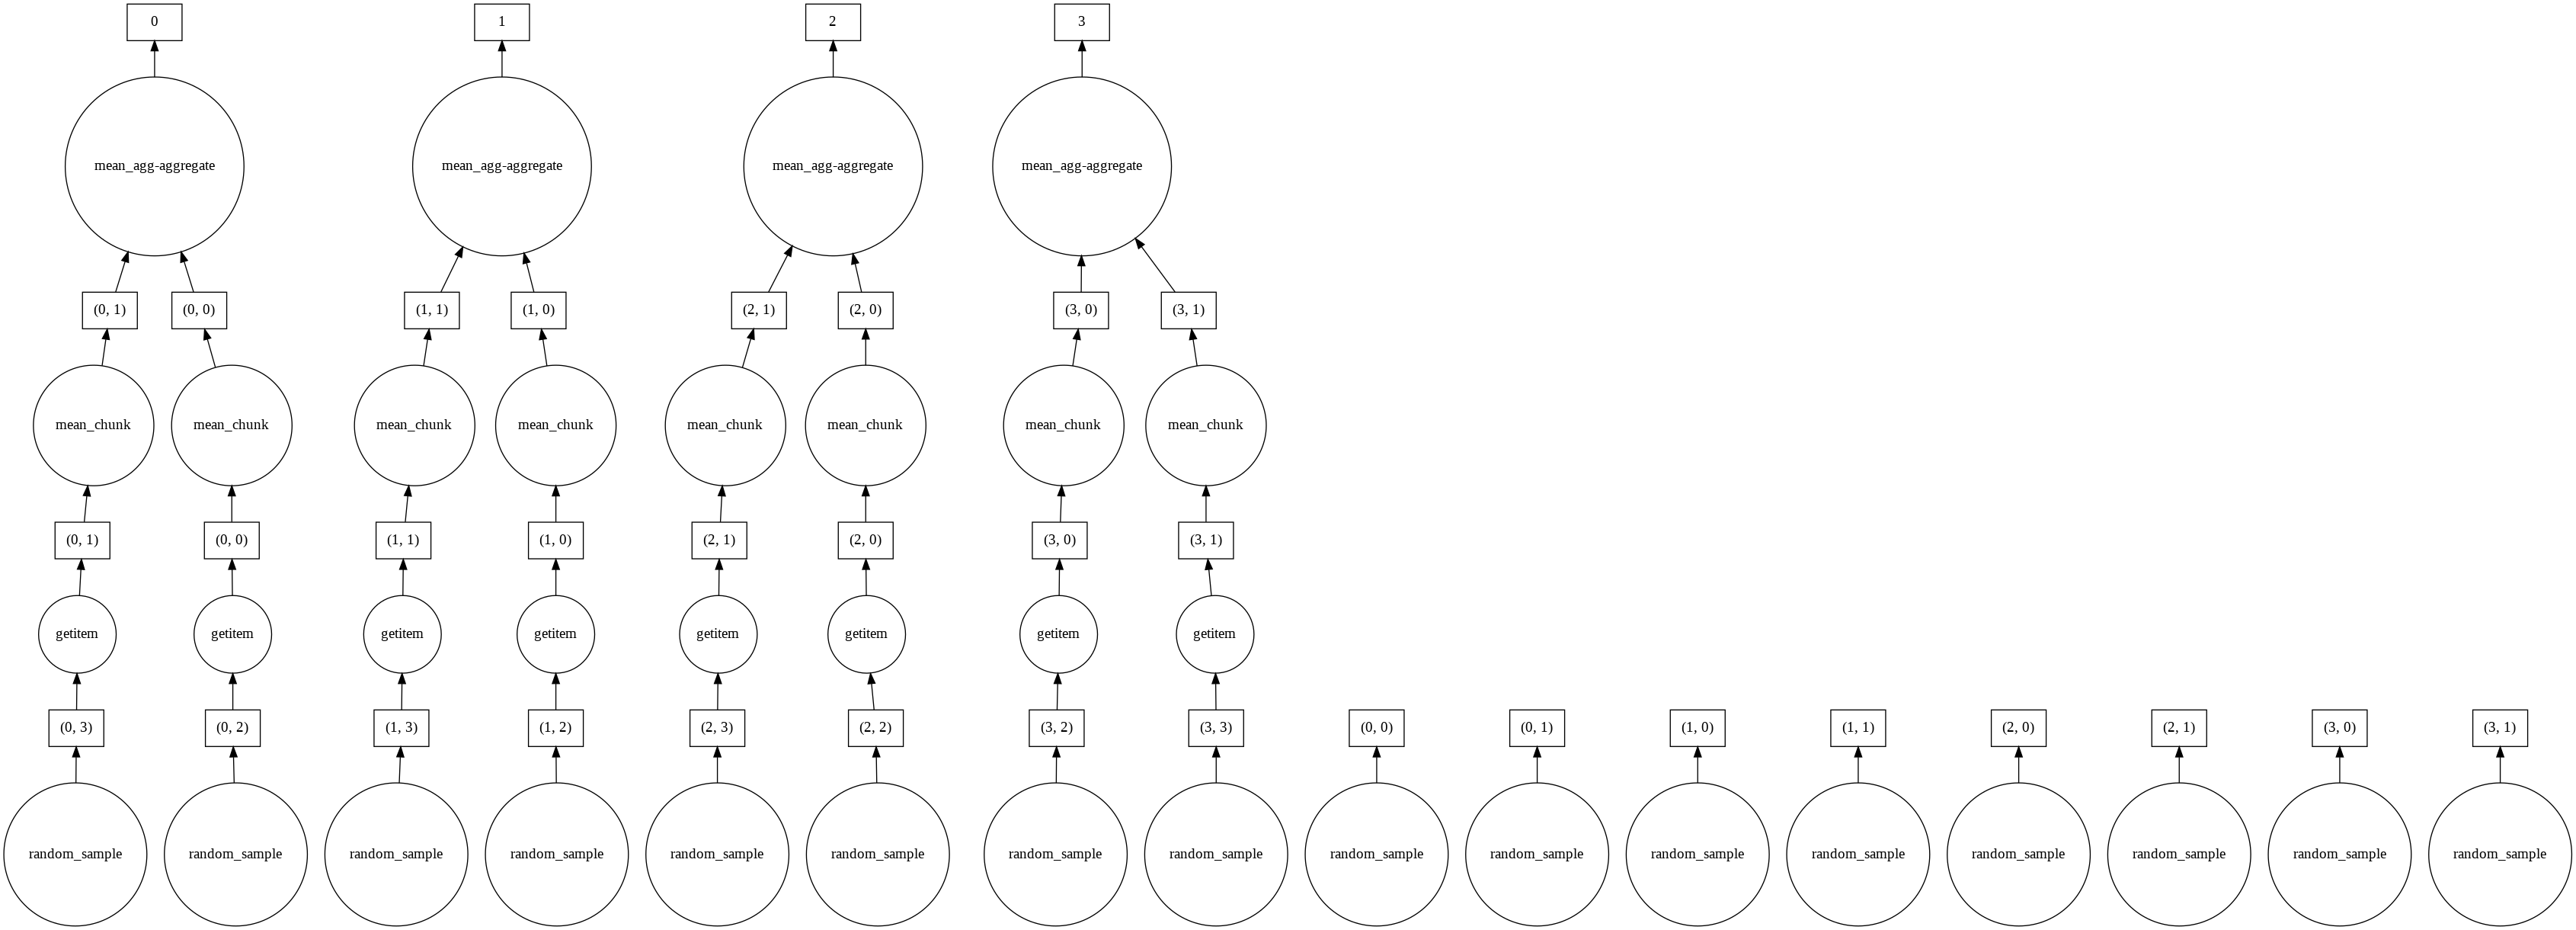

In [35]:
x = da.random.random((10000, 10000))
z = x[::2, 5000:].mean(axis=1)
z.visualize()

In [37]:
%time z.compute(scheduler=scheduler_types['SINGLE-THREADED'])

CPU times: user 493 ms, sys: 23.4 ms, total: 517 ms
Wall time: 519 ms


array([0.50055577, 0.49933106, 0.49967047, ..., 0.50134822, 0.5041751 ,
       0.49982923])

In [89]:
client

Client Scheduler: tcp://127.0.0.1:46259 Dashboard: http://127.0.0.1:33321/status,Cluster Workers: 2 Cores: 2 Memory: 13.65 GB


In [44]:
for key, value in scheduler_types.items():
    print(f'{key} run:')
    %time z.compute(scheduler=value)
    print('----------------------------')

MULTIPROCESSING run:
CPU times: user 50.3 ms, sys: 27.4 ms, total: 77.7 ms
Wall time: 511 ms
----------------------------
PROCESSES run:
CPU times: user 59.6 ms, sys: 31.1 ms, total: 90.7 ms
Wall time: 508 ms
----------------------------
SINGLE-THREADED run:
CPU times: user 496 ms, sys: 5.33 ms, total: 501 ms
Wall time: 502 ms
----------------------------
SYNC run:
CPU times: user 498 ms, sys: 2.21 ms, total: 501 ms
Wall time: 497 ms
----------------------------
SYNCHRONOUS run:
CPU times: user 500 ms, sys: 3.25 ms, total: 503 ms
Wall time: 498 ms
----------------------------
THREADING run:
CPU times: user 785 ms, sys: 5.72 ms, total: 791 ms
Wall time: 424 ms
----------------------------
THREADS run:
CPU times: user 781 ms, sys: 4.15 ms, total: 785 ms
Wall time: 436 ms
----------------------------


In [45]:
client = Client()

/usr/local/lib/python3.7/dist-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


In [46]:
client

Client Scheduler: tcp://127.0.0.1:46259 Dashboard: http://127.0.0.1:33321/status,Cluster Workers: 2 Cores: 2 Memory: 13.65 GB


In [50]:
x = da.random.random((10000, 10000), chunks=(1000, 1000))
z = x[::2, 5000:].mean(axis=1)

In [49]:
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [51]:
for key, value in scheduler_types.items():
    print(f'{key} run:')
    %time z.compute(scheduler=value)
    print('----------------------------')

MULTIPROCESSING run:
CPU times: user 234 ms, sys: 75 ms, total: 309 ms
Wall time: 794 ms
----------------------------
PROCESSES run:
CPU times: user 260 ms, sys: 78.2 ms, total: 339 ms
Wall time: 845 ms
----------------------------
SINGLE-THREADED run:
CPU times: user 619 ms, sys: 15.7 ms, total: 635 ms
Wall time: 625 ms
----------------------------
SYNC run:
CPU times: user 638 ms, sys: 20.9 ms, total: 659 ms
Wall time: 644 ms
----------------------------
SYNCHRONOUS run:
CPU times: user 633 ms, sys: 17 ms, total: 650 ms
Wall time: 639 ms
----------------------------
THREADING run:
CPU times: user 888 ms, sys: 24.4 ms, total: 912 ms
Wall time: 521 ms
----------------------------
THREADS run:
CPU times: user 896 ms, sys: 18.6 ms, total: 914 ms
Wall time: 524 ms
----------------------------


In [53]:
import dask

In [108]:
df = dask.datasets.timeseries('2000', '2001', freq='H', partition_freq='1M')

In [110]:
df

,id,name,x,y
npartitions=11,,,,
2000-01-31,int64,object,float64,float64
2000-02-29,...,...,...,...
...,...,...,...,...
2000-11-30,...,...,...,...
2000-12-31,...,...,...,...


In [109]:
%time df.compute(scheduler=scheduler_types['THREADING'])

CPU times: user 54.5 ms, sys: 6.91 ms, total: 61.5 ms
Wall time: 66 ms


,id,name,x,y
timestamp,,,,
2000-01-31 00:00:00,956,Kevin,-0.630205,-0.874719
2000-01-31 01:00:00,985,Ray,0.074379,0.800400
2000-01-31 02:00:00,1054,Jerry,-0.745324,-0.158077
2000-01-31 03:00:00,991,Jerry,0.018952,-0.272143
2000-01-31 04:00:00,972,Frank,-0.972247,0.180069
...,...,...,...,...
2000-12-30 19:00:00,989,Dan,0.122114,-0.583178
2000-12-30 20:00:00,1018,Yvonne,0.076272,0.800742
2000-12-30 21:00:00,998,Tim,0.040811,0.671349


In [62]:
data = [ 1, 2, 3, 4, 5 ]
d = 0

In [64]:
@delayed
def inc_1(x):
    return x + 1

In [65]:
@delayed
def inc_2(x):
    return x + 2

In [66]:
for x in data:
    a = inc_1(x) 
    b = inc_2(x)
    d = d + a + b

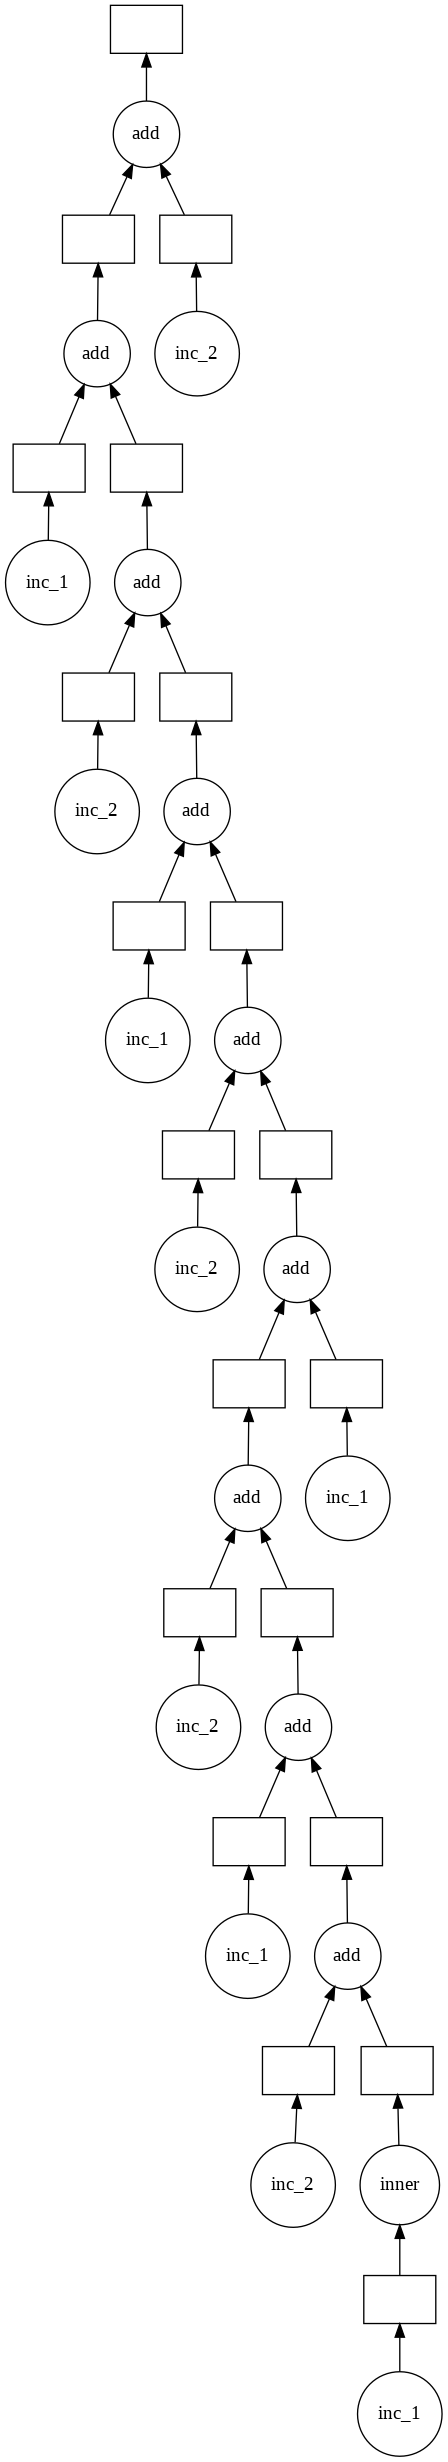

In [69]:
d.visualize()


# Exercitii
---



In [70]:
def inc(x):
    return x + 1

In [75]:
x = client.submit(inc, 10)
x

<Future: status: finished, type: int, key: inc-fab9329de0b869ffda4bf87f4dc9c02e>

In [74]:
L = client.map(inc, range(1000))

In [76]:
y = client.submit(inc, x)

In [77]:
total = client.submit(sum, L)

In [88]:
client.compute(total)

<Future: status: finished, type: int, key: sum-f085d72055846305d13dfe68c88648d7>

In [111]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2021-03-10 16:25:26--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.196.3.7, 3.225.89.236, 34.196.37.54, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.196.3.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  44.2MB/s    in 0.3s    

2021-03-10 16:25:26 (44.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [112]:
client

Client Scheduler: tcp://127.0.0.1:46259 Dashboard: http://127.0.0.1:33321/status,Cluster Workers: 2 Cores: 2 Memory: 13.65 GB


In [ ]:
# expose Dask's status dashboard to a public URL
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

In [127]:
get_ipython().system_raw('./ngrok http 8787 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://8d0400d16e47.ngrok.io
